Filename: _3_naive_bayes.ipynb <br>
Title: Naive Bayes model building <br>
Author: Raghava | GitHub: @raghavtwenty <br>
Date Created: June 10, 2023 | Last Updated: May 13, 2024 <br>
Language: Python | Version: 3.10.14, 64-bit <br>

Importing Required Libraries


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from _1_confus_mat_display import display_confus_matrix
from _2_scale_transform import transform_new_input

Importing Preprocessed Dataset


In [14]:
data_frame = pd.read_csv("../datasets/cleaned_dataset.csv")

Train Test split


In [15]:
X = data_frame.drop(columns=["Label"])
y = data_frame["Label"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

Naive Bayes classifier


In [16]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred_nb = nb_classifier.predict(X_test)

In [17]:
X_test

,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Bytes,Delta Sent Bytes,Delta Port alive Duration (S),Connection Point,Total Load/Rate,Active Flow Entries,Packets Matched
2390,0.333333,0.004799,0.162585,0.106062,0.005434,0.341841,0.000000,0.000045,1.0,0.25,0.265172,0.004967,0.009762
196,1.000000,0.992862,0.054801,0.450012,0.378980,0.900638,0.000088,0.000045,1.0,0.75,0.265172,0.000000,0.660033
2307,0.666667,0.007368,0.023744,0.026935,0.006087,0.050137,0.000919,0.000876,0.0,0.50,0.265389,0.003311,0.005703
1731,0.333333,0.000391,0.000035,0.026388,0.000596,0.027347,0.000000,0.000044,1.0,0.25,0.265172,0.003311,0.001629
1100,0.333333,0.000306,0.000054,0.000041,0.000183,0.030386,0.000051,0.000007,1.0,0.25,0.265172,0.003311,0.000638
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443,1.000000,0.988916,0.054103,0.116169,0.500759,0.252507,0.000044,0.000045,1.0,0.75,0.265172,0.003311,0.634088
381,1.000000,0.037919,0.002676,0.000008,0.000033,0.004558,0.000095,0.000044,1.0,0.75,0.265172,0.006623,0.026977
1780,0.333333,0.000437,0.000076,0.046867,0.215582,0.048617,0.000044,0.043192,1.0,0.25,0.265172,0.003311,0.090681
962,0.333333,0.007549,0.000572,0.000059,0.000235,0.044060,0.000859,0.000044,1.0,0.50,0.265172,0.001656,0.003995


Classification Metrics


In [18]:
classifi_report = classification_report(y_test, y_pred_nb)
print(classifi_report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       144
           1       0.80      0.50      0.62       117
           2       0.52      0.96      0.68       113
           3       0.97      0.45      0.62       139
           4       0.56      0.71      0.63        73

    accuracy                           0.73       586
   macro avg       0.77      0.73      0.71       586
weighted avg       0.80      0.73      0.72       586



Confusion Matrix


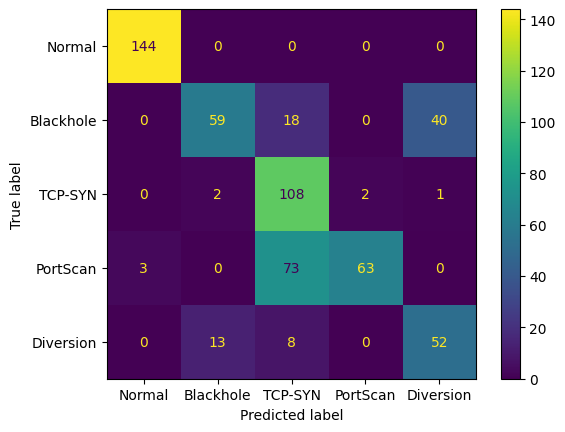

In [19]:
display_confus_matrix(y_test, y_pred_nb)

Evaluating accuracy


In [20]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.4f}")

Naive Bayes Accuracy: 0.7270


Save the model

In [21]:
from joblib import dump
dump(nb_classifier, "../models/m1_naive_bayes.joblib")

['../models/m1_naive_bayes.joblib']

Test data for each category with new user input

In [22]:
l0_x = [[4, 350188, 14877116, 101354648, 159524, 2910, 278, 280, 5, 4, 0, 6, 667324]]

l1_x = [[2, 2326, 12856942, 31777516, 2998, 2497, 560, 560, 5, 2, 0, 4, 7259]]

l2_x = [[4, 150, 19774, 6475473, 3054, 166, 556, 6068, 5, 4, 502, 6, 7418]]

l3_x = [[2, 209, 20671, 6316631, 274, 96, 3527, 2757949, 5, 2, 183877, 8, 90494]]

l4_x = [[2, 1733, 37865130, 38063670, 3187, 2152, 0, 556, 5, 3, 0, 4, 14864]]

New input prediction

In [23]:
# Importing required libraries
import numpy as np
from joblib import load
from _2_scale_transform import transform_new_input

# Load the model
model = load("../models/m1_naive_bayes.joblib")

# Preprocessing input
user_input = np.array(l1_x) # Change values and try changing "l1_x"
user_input = transform_new_input(user_input)

# Prediction
predict = model.predict(user_input)

# Final Show
print(f"Predicted label: {predict[0]}")

Predicted label: 1


/Users/raghav/miniconda3/envs/ids/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
